# Simple Linear Autoencoder for MNIST

In [1]:
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.activations as activations
from tensorflow.python.keras.models import Model
import os
import scipy
from tqdm import tqdm
import numpy as np
import util
from matplotlib import pyplot as plt

## Some Helper Functions

In [2]:
def show_image(img):
    plt.figure()
    plt.imshow(img)
    plt.show()

In [3]:
def show_side_by_side(img1, img2):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.show()

## The Dataset

Loading the MNIST Dataset. Ignoring the y values, since they are not needed to train the autoencoder. 

In [4]:
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

There are 60,000 images of numbers with values ranging from 0 to 255.

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
np.max(x_train)

255

In [7]:
np.min(x_train)

0

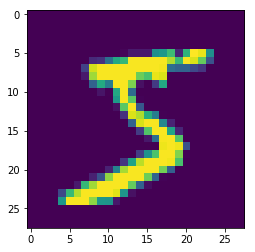

In [10]:
show_image(x_train[0])

Normalizing the dataset to values betweeen 0 and 1.

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
np.max(x_train)

1.0

In [11]:
np.min(x_train)

0.0

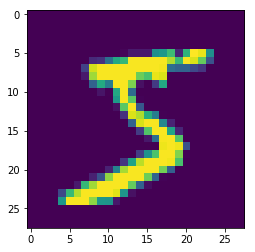

In [12]:
show_image(x_train[0])

## The Model

Defining some constants for later. Even if the memory permits it, do not use too large a BATCH_SIZE, that can decreas learning rate A LOT, probably connected to the effect obeserved here: https://arxiv.org/pdf/1609.04836.pdf.

In [13]:
LEARNING_RATE = 1.0
BATCH_SIZE = 100
EPOCHS = 30

Building the Model of the autoencoder. Just a simple linear model.

In [14]:
input_layer = layers.Input(shape=(28,28))

x = layers.Flatten()(input_layer) # 28*28=784
x = layers.Dense(256, activation=activations.relu)(x)
x = layers.Dense(8, activation=activations.relu)(x)
x = layers.Dense(256, activation=activations.relu)(x)
x = layers.Dense(784, activation=activations.relu)(x)

output_layer = layers.Reshape((28,28))(x)

model = Model(input_layer, output_layer)

Defining the optimizer and loss function. Using the simple stochastic gradient decent optimizer and mean squared error loss. Also using momentum for faster convergence.

In [15]:
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=0.9)
loss = keras.losses.mean_squared_error

Compiling the model.

In [16]:
model.compile(optimizer=optimizer, loss=loss)

Fitting the model to the data. The input and output data is the same, to teach the autoencoder to recover the original input.

In [17]:
history = model.fit(x=x_train, y=x_train, batch_size=BATCH_SIZE, validation_data=(x_test, x_test), epochs=EPOCHS, shuffle=True, verbose=2, )

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 5s - loss: 0.0463 - val_loss: 0.0349
Epoch 2/30
 - 3s - loss: 0.0325 - val_loss: 0.0307
Epoch 3/30
 - 3s - loss: 0.0295 - val_loss: 0.0284
Epoch 4/30
 - 3s - loss: 0.0280 - val_loss: 0.0273
Epoch 5/30
 - 3s - loss: 0.0268 - val_loss: 0.0262
Epoch 6/30
 - 3s - loss: 0.0260 - val_loss: 0.0256
Epoch 7/30
 - 3s - loss: 0.0250 - val_loss: 0.0243
Epoch 8/30
 - 3s - loss: 0.0239 - val_loss: 0.0234
Epoch 9/30
 - 3s - loss: 0.0232 - val_loss: 0.0228
Epoch 10/30
 - 3s - loss: 0.0228 - val_loss: 0.0223
Epoch 11/30
 - 3s - loss: 0.0224 - val_loss: 0.0219
Epoch 12/30
 - 3s - loss: 0.0221 - val_loss: 0.0219
Epoch 13/30
 - 3s - loss: 0.0218 - val_loss: 0.0215
Epoch 14/30
 - 3s - loss: 0.0215 - val_loss: 0.0213
Epoch 15/30
 - 3s - loss: 0.0212 - val_loss: 0.0210
Epoch 16/30
 - 3s - loss: 0.0211 - val_loss: 0.0208
Epoch 17/30
 - 3s - loss: 0.0209 - val_loss: 0.0207
Epoch 18/30
 - 3s - loss: 0.0207 - val_loss: 0.0205
Epoch 19/30
 - 3s - los

## Visualizing the Results

In [18]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

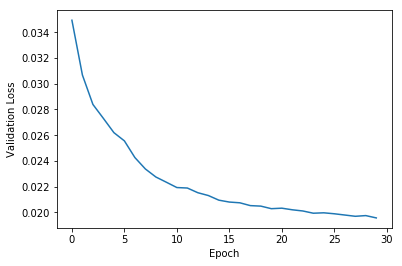

In [19]:
plt.figure()
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.show()

Using the model on the complete test set.

In [20]:
results = model.predict(x_test)

Visualizing some examples. On the left is the original image, on the right is the image recovered by the autoencoder.

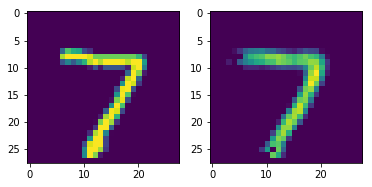

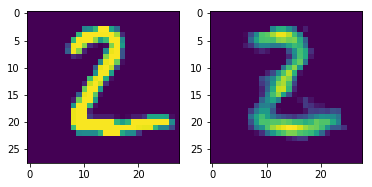

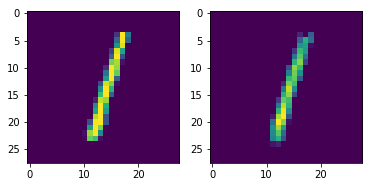

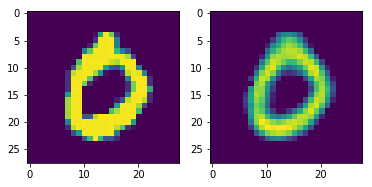

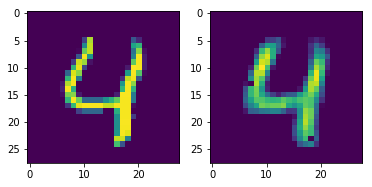

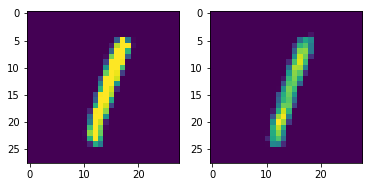

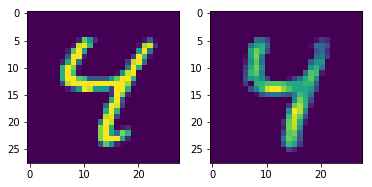

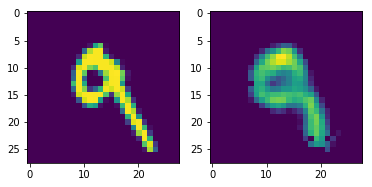

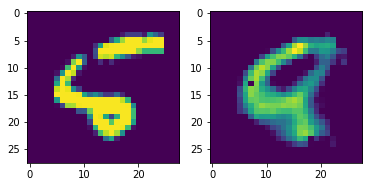

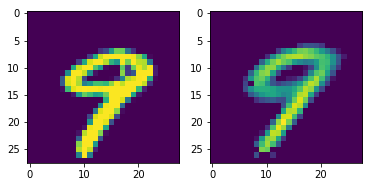

In [21]:
for i in range(10):
    show_side_by_side(x_test[i], results[i])

## Saving the model

In [22]:
model.save('mnist_autoencoder.h5')